# Water Quality Data Analyzing
### 2324_유상욱

## 1. Data Import
##### 사용할때 하단의 !kaggle과 !tar 앞의 # 제거

In [1]:
# Kaggle Data Import
# https://www.kaggle.com/adityakadiwal/water-potability
#!kaggle datasets download -d adityakadiwal/water-potability

In [2]:
# CSV Unzip
#!tar -xvf water-potability.zip

## 2. Data Load

In [3]:
# Python Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('water_potability.csv')

## 3. Data Info

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
# Columns명 출력
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

### Columns Meaning
* ph : 물의 산성, 아칼리성 구분 (0~14)
* Hardness : 물의 경도, 물의 세기의 정도 / 마그네슘 등에 의해 결정
* Solids : TDS, 물 속의 유기물과 무기물의 총량
* Chloramines : 물 속 잔류 염소
* Sulfate : 물 속 황산염의 양
* Conductivity : 물의 전기 전도성
* Organic_carbon : 수중에 유기적으로 결합된 탄소의 양
* Trihalomethanes : 물 속 트리할로메탄(소독 부산물)의 양
* Turbidity : 물의 탁도
* Potability : 물이 안전한지 안한지 / 음용:1, 불가:0

In [7]:
df.shape

(3276, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# 결측값 평균으로 대체
def replace_Nan(info):
    for col in info.columns:
        info[col].fillna(np.mean(info[col]), inplace=True)
    return info
df = replace_Nan(df)

#결측값 유무 확인
df.columns[df.isnull().any()]

Index([], dtype='object')

In [11]:
df.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

## 4. EDA

<AxesSubplot:>

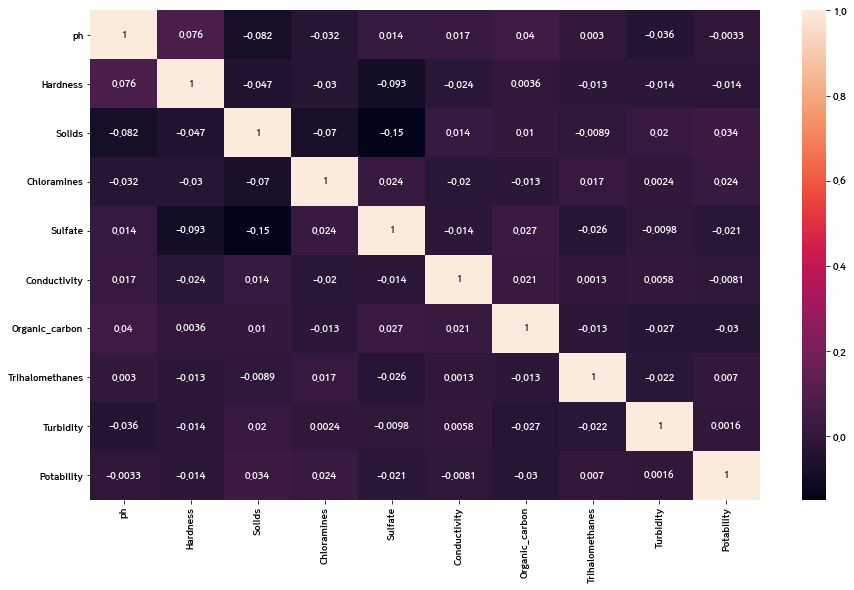

In [12]:
# heatmap 상관관계
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

<Figure size 864x432 with 0 Axes>

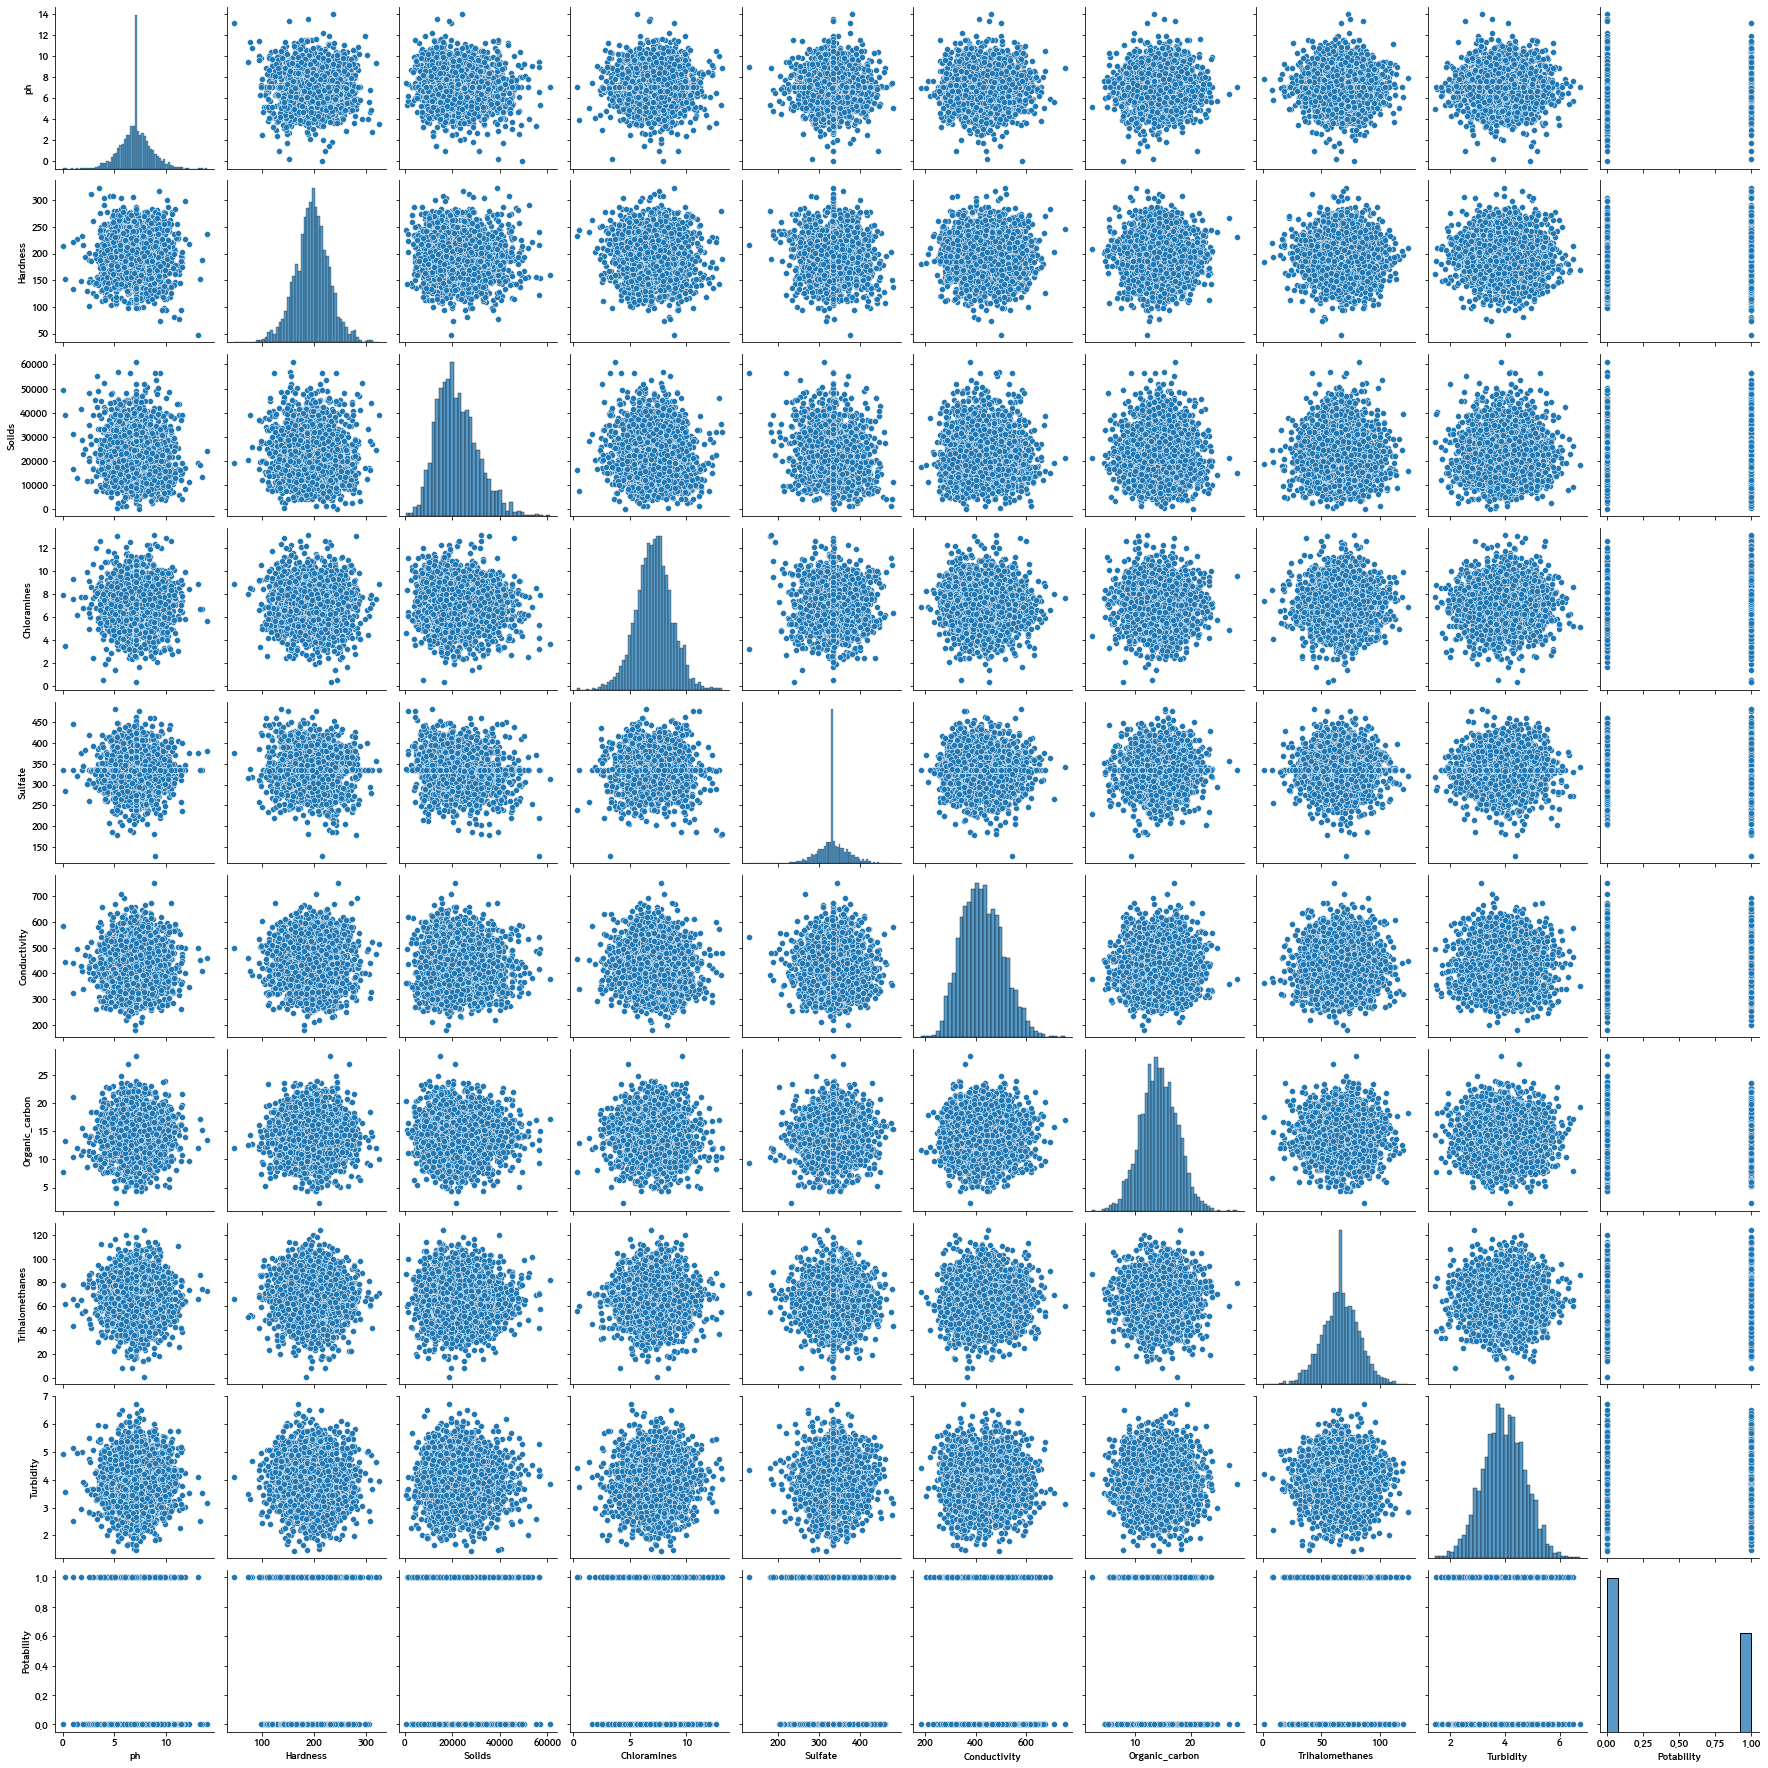

In [13]:
# pairplot 상관관계
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

### 가설 Ⅰ 
* 1. 음용성과 탁도의 관계 / 물이 탁하면 물이 위험할 것이다
* 2. 경도와 탁도의 관계 / 탁도가 높으면 경도가 높을 것이다.

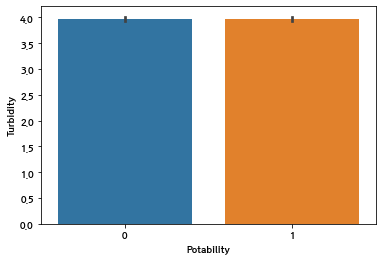

In [14]:
# 음용성과 탁도의 관계 파악
sns.barplot(x='Potability', y='Turbidity', data=df)
plt.show()

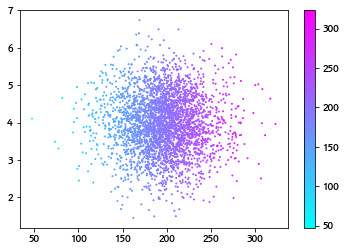

In [15]:
# 경도, 탁도 - Scatter Plot
x = df['Hardness']
y = df['Turbidity']
plt.scatter(x, y, c=x, cmap='cool', s = 1)
plt.colorbar()
plt.show()

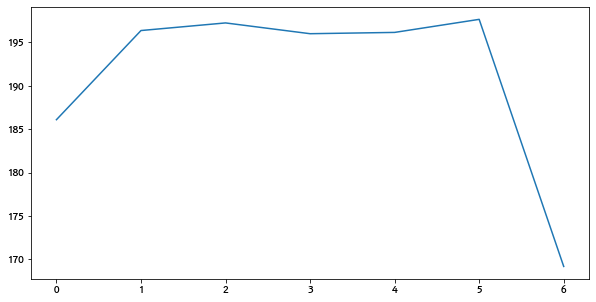

In [16]:
# 경도, 탁도 - Line Plot
df3 = df.groupby('Hardness')['Turbidity'].mean().reset_index()
df3.Turbidity = round(df3.Turbidity)

hardness_data = []
for i in range(1, 8):
    hardness_data.append(df3.loc[df3.Turbidity == i, 'Hardness'].mean())
plt.figure(figsize=(10, 5))
sns.lineplot(data=hardness_data)
plt.show()

### ⅰ) 물이 탁하면 물이 위험할 것인가?
* barplot 결과 값이 거의 유사하다
* 따라서, 물이 탁하다고 해서, 음용성에 대한 변화가 생기진 않는다.
* 경도와 탁도의 관계의 경우, ScatterPlot과 LinePlot을 이용해 분석했는데, 탁도가 증가한다하여, 경도가 증가하는 모습은 보이지 않고, 대부분 경도의 평균값인 196(약 200)의 근처에서 요동치는 모습을 보임.
* 따라서, 물의 탁도와 경도는 관계가 없음

### 가설 Ⅱ
* pH와 Chloramines의 관계 / 산성도가 높으면 염소 함유량도 높을까?
* pH와 Sulfate의 관계 / 황산염과 산성도는 관계가 없을까?

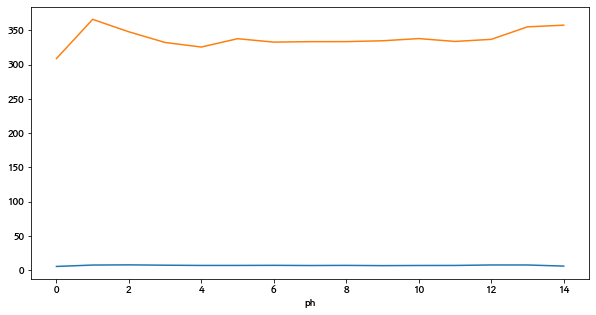

In [17]:
df4 = df.copy()
df4.drop(['Hardness', 'Solids', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'], axis=1, inplace=True)
df4.ph = round(df4.ph)

ch_data = []
su_data = []

for i in range(int(df4.ph.min()), int(df4.ph.max()) + 1):
    ch_data.append(df4.loc[df4.ph == i, 'Chloramines'].mean())
    su_data.append(df4.loc[df4.ph == i, 'Sulfate'].mean())

plt.figure(figsize=(10, 5))
sns.lineplot(data=ch_data)
sns.lineplot(data=su_data)
plt.xlabel('ph')
plt.show()

### Ⅱ) pH와 Chloramines, pH와 Sulfate의 관계
* pH와 Chloramines, pH와 Sulfate의 그래프 모두 특정한 규칙이 없음
* pH와 Chloramines, pH와 Sulfate 두 가지 모두 관계가 없다.

### 가설 Ⅲ
* Chloramines와 Trihalomethanes의 관계
* Chloramines가 높으면 Trihalomethanes도 높을까?

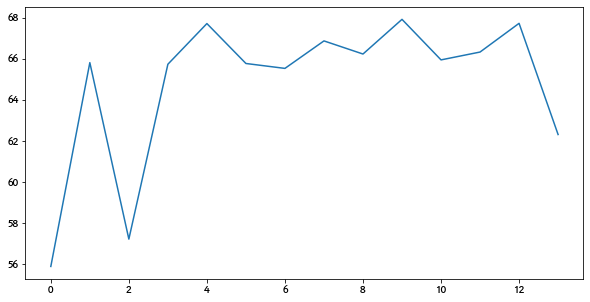

In [18]:
#plt.figure(figsize=(10, 5))
#sns.lineplot(x='Trihalomethanes', y='Chloramines', data=df)
#plt.show()

df5 = df.groupby('Trihalomethanes')['Chloramines'].mean().reset_index()
df5.Chloramines = round(df5.Chloramines)
chloramines_data = []

for i in range(int(df5.Chloramines.min()), int(df5.Chloramines.max()) + 1):
    chloramines_data.append(df5.loc[df5.Chloramines == i, 'Trihalomethanes'].mean())
plt.figure(figsize=(10, 5))
sns.lineplot(data=chloramines_data)
plt.show()

### Ⅲ) Chloramines와 Trihalomethanes의 관계
* Chloramines가 높으면 Trihalomethanes도 높을까?
* Chloramines의 값을 반올림해 정수화시키고, 해당 정수에 대해 평균을 구한 결과로 그래프를 생성했는데, 특징이 발견되지 않았음.
* 따라서, Chloramines와 Trihalomethanes은 관계가 없다